In [1]:
print('Basit')

Basit


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df =pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


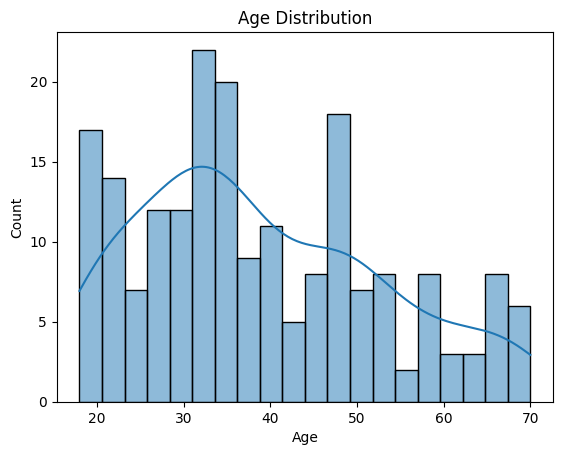

In [19]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

<Axes: >

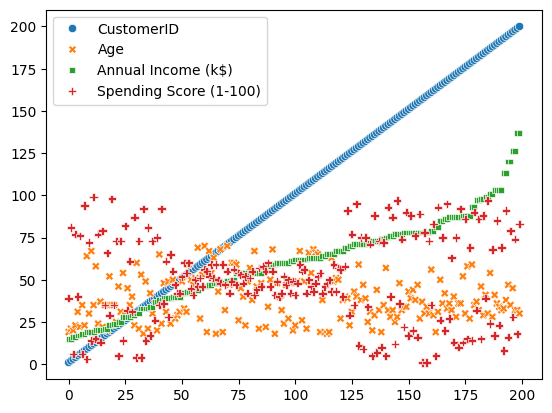

In [20]:
sns.scatterplot(df)

In [33]:
print(df['Genre'].isnull().sum())


0


In [37]:
df=df.dropna(subset=['Genre'])

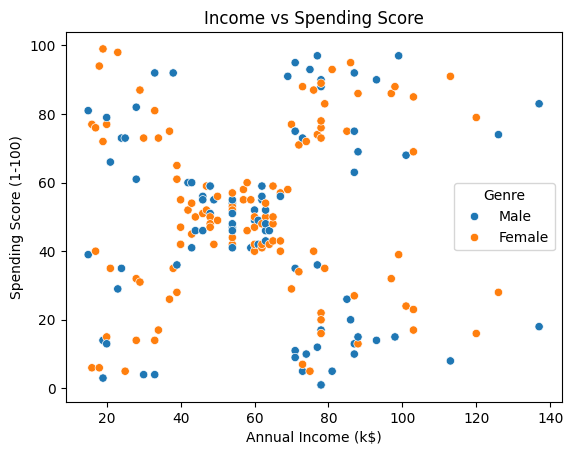

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title("Income vs Spending Score")
plt.show()



In [46]:
df['Genre']= df['Genre'].map({'Male':0, 'Female':1})

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


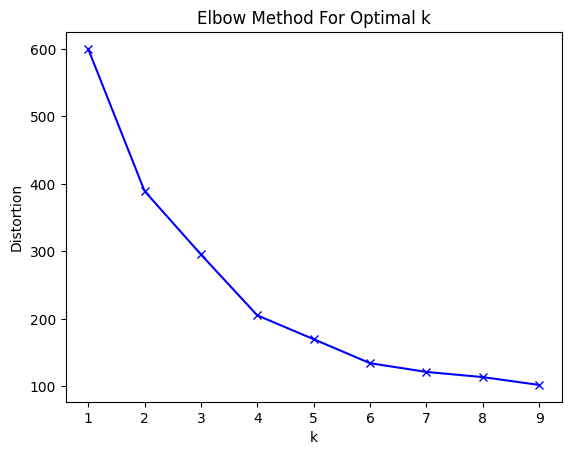

In [50]:
from sklearn.cluster import KMeans
import numpy as np

distortions = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()




In [60]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(features_scaled)

df['KMeans_Cluster'] = clusters_kmeans


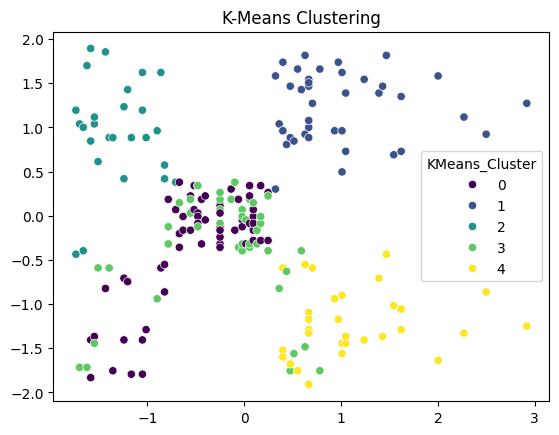

In [61]:
sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering")
plt.show()




In [62]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_clusters = gmm.fit_predict(features_scaled)

df['GMM_Cluster'] = gmm_clusters


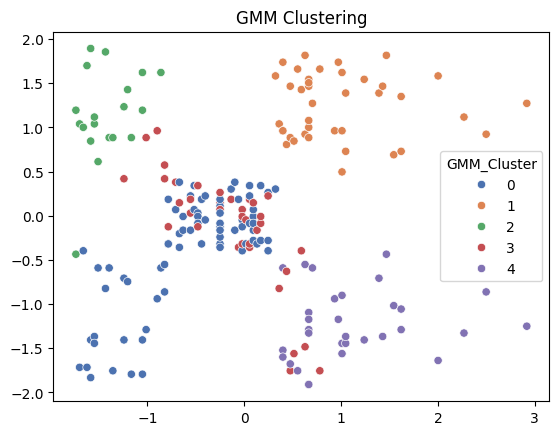

In [63]:
sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=df['GMM_Cluster'], palette='deep')
plt.title("GMM Clustering")
plt.show()


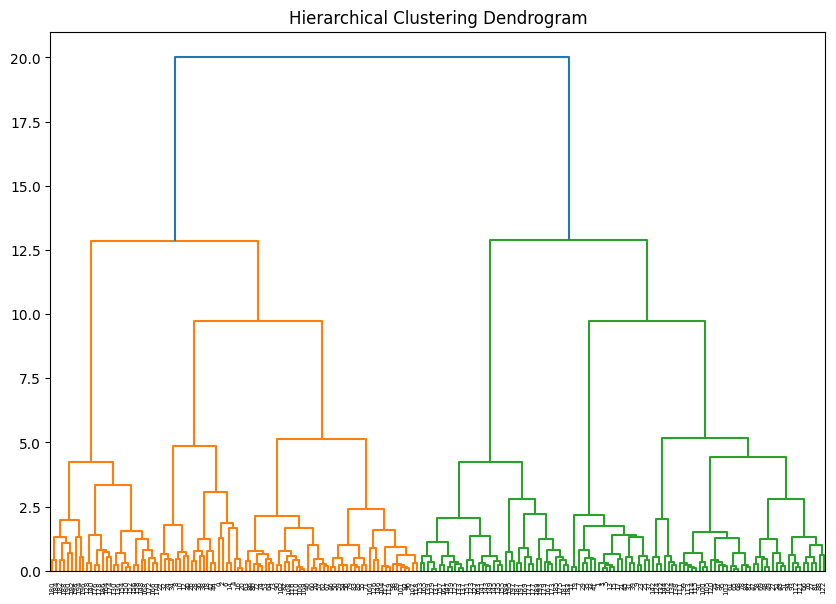

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [65]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=5)
clusters_hierarchical = agglomerative.fit_predict(features_scaled)

df['Hierarchical_Cluster'] = clusters_hierarchical


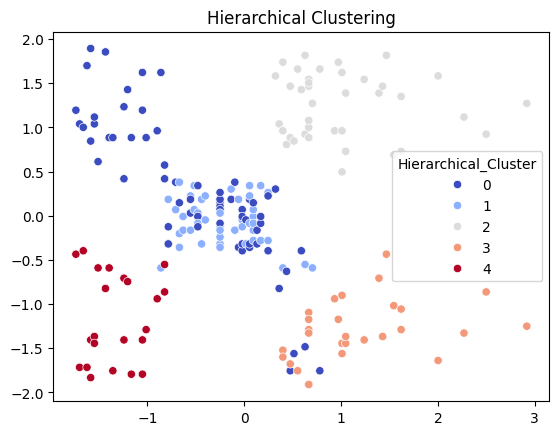

In [66]:
sns.scatterplot(x=features_scaled[:, 1], y=features_scaled[:, 2], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.title("Hierarchical Clustering")
plt.show()


In [67]:
from sklearn.metrics import silhouette_score

print("K-Means Silhouette Score:", silhouette_score(features_scaled, clusters_kmeans))
print("GMM Silhouette Score:", silhouette_score(features_scaled, gmm_clusters))
print("Hierarchical Clustering Silhouette Score:", silhouette_score(features_scaled, clusters_hierarchical))


K-Means Silhouette Score: 0.40846873777345605
GMM Silhouette Score: 0.376440749908192
Hierarchical Clustering Silhouette Score: 0.39002826186267214
